<a href="https://colab.research.google.com/github/aditya0811/ML_Projects/blob/master/we_rate_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ABOUT PROJECT

The data here is from the three files,twitter_archive_csv,image_predictions_tsv,tweet_json.txt.The first file contains information about the tweet such as its id,text;2nd file contains the prediction of the breed of the picture of dog from a particular tweet,3rd file gives us the missing information about the tweets such as retweet_count,favorite_count.

I combined this data and extracted information about the tweets using Twitter API,extracted things like name of the dog,ratings of the dog.

# Project Outcomes



*   Combined data from different resources and used join method in pandas

*   Converted JSON file format into pandas dataframe
*   Extracted names from "text" column for the dogs
*   Did necessary changes to the dataframe and analysed data pn the basis of dog_stage,favorite_count,retweet_count

##TASKS
### Quality

*   Tweets with no images
*   Removing retweets 
*   Display full content of 'text' column.
*   Removing &amp and relacing it using &
*   Changing the sources to more readable categories
*   Remove unnecessary numbers from timestamp column and change data type to datetime

*   Display full content of 'text' column.


*   The name column has many entries which do not look like names. The most frequent entry in name column is "a", which is not a name


*   The numerator and denominator columns have unusual values.


*   Adding dog breed column 

### Tidiness



*   Dog "stage" variable in four columns: doggo, floofer, pupper, puppo
*   Joining 'tweet_info' and 'image_predictions' to 'twitter_archive









In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

In [0]:
import requests
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
open('p', 'wb').write(r.content)


335079

In [0]:
df = pd.read_csv('gdrive/My Drive/twitter-archive-enhanced.csv')
df2 =pd.read_csv('gdrive/My Drive/image-predictions.tsv',sep='\t')

In [0]:
# For loop which will add each available tweet to a new line of tweet_json.txt
with open('tweet_json.txt', 'a', encoding='utf8') as f:
    for tweet_id in df['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, f)
            f.write('\n')
        except:
            continue

In [0]:
# For loop to append each tweet into a list
tweets_data = []

tweet_file = open('gdrive/My Drive/tweet-json.txt', "r")

for line in tweet_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
        
tweet_file.close()

In [0]:
# Create tweet_info DataFrame
tweet_info = pd.DataFrame()

In [0]:
# Add selected variables to tweet_info DataFrame
tweet_info['id'] = list(map(lambda tweet: tweet['id'], tweets_data))
tweet_info['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweets_data))
tweet_info['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweets_data))

In [11]:
tweet_info.head(5)

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [0]:
# Create copies of original DataFrames to work off of
twitter_archive_clean = df.copy()
image_predictions_clean = df2.copy()
tweet_info_clean = tweet_info.copy()

In [14]:
twitter_archive_clean.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [15]:
image_predictions_clean.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [16]:
tweet_info_clean.head(5)

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [17]:
twitter_archive_clean.name.value_counts()

None         745
a             55
Charlie       12
Oliver        11
Lucy          11
Cooper        11
Lola          10
Penny         10
Tucker        10
Bo             9
Winston        9
the            8
Sadie          8
an             7
Bailey         7
Toby           7
Buddy          7
Daisy          7
Rusty          6
Koda           6
Stanley        6
Leo            6
Dave           6
Bella          6
Jax            6
Jack           6
Milo           6
Scout          6
Oscar          6
very           5
            ... 
light          1
Danny          1
Mimosa         1
Tayzie         1
my             1
Clyde          1
Skittles       1
Adele          1
Jay            1
Aja            1
Geno           1
Yoda           1
Dixie          1
Arya           1
Mitch          1
Willy          1
Brady          1
Bode           1
Glacier        1
by             1
Bowie          1
Taco           1
Tassy          1
Tino           1
Darrel         1
Shawwn         1
Travis         1
Kawhi         

## Quality

*   Tweets with no images
*   Removing retweets 
*   Display full content of 'text' column.
*   Removing &amp and relacing it using &
*   Changing the sources to more readable categories
*   Remove unnecessary numbers from timestamp column and change data type to datetime

*   Display full content of 'text' column.


*   The name column has many entries which do not look like names. The most frequent entry in name column is "a", which is not a name


*   The numerator and denominator columns have unusual values.


*   Adding dog breed column 





## Tidiness



*   Dog "stage" variable in four columns: doggo, floofer, pupper, puppo
*   Joining 'tweet_info' and 'image_predictions' to 'twitter_archive'



**Removing rows with no images**

In [0]:
twitter_archive_clean = twitter_archive_clean.dropna(subset=['expanded_urls'])

In [19]:
#Checking
sum(twitter_archive_clean['expanded_urls'].isnull())

0

**We do not want to deal with retweets**

In [0]:
#Select rows where 'retweeted_status_id' is null to save to twitter_archive_clean
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].isnull()]

**Display full content of 'text' column.**

In [0]:
# Set column width to infinite so entire content of 'text' column is displayed
pd.set_option('display.max_colwidth', -1)

In [21]:
twitter_archive_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
242,846153765933735936,NaN,NaN,2017-03-27 00:15:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Vixen. He really likes bananas. Steals them when he thinks nobody's watching. 13/10 opportunistic af https://t.co/a0CkS5ExFR,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/846153765933735936/photo/1,https://twitter.com/dog_rates/status/846153765933735936/photo/1",13,10,Vixen,None,None,None,None
1771,678334497360859136,NaN,NaN,2015-12-19 22:02:01 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Rosie. She has a snazzy bow tie and a fin for a tail. Probably super fast underwater. Cool socks 10/10 https://t.co/GO76MdGBs0,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678334497360859136/photo/1,10,10,Rosie,None,None,None,None
1898,674690135443775488,NaN,NaN,2015-12-09 20:40:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Patrick. He's an exotic pup. Jumps great distances for a dog. Always gets injured when I toss him a ball. 3/10 https://t.co/Unz1uNrOzo,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674690135443775488/photo/1,3,10,Patrick,None,None,None,None
1980,672975131468300288,NaN,NaN,2015-12-05 03:05:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Chuckles. He is one skeptical pupper. 10/10 stay woke Chuckles https://t.co/ZlcF0TIRW1,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672975131468300288/photo/1,10,10,Chuckles,None,None,pupper,None
526,808838249661788160,NaN,NaN,2016-12-14 00:57:20 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Ito. He'll be your uber driver tonight. Currently adjusting the mirrors. 13/10 incredibly h*ckin responsible https://t.co/Zrrcw29o13,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808838249661788160/photo/1,13,10,Ito,None,None,None,None


**Removing names like None and trying to correct them using text column**

In [0]:
twitter_archive_clean['text_split'] = twitter_archive_clean['text'].str.split()

In [0]:
import re
names = []

# use string starts with method to clean this up

def extract_names(row):
    
    # 'named Phineas'           
    if 'named' in row['text'] and re.match(r'[A-Z].*', row['text_split'][(row['text_split'].index('named') + 1)]): 
            names.append(row['text_split'][(row['text_split'].index('named') + 1)])
    
    # 'Here we have Phineas'
    elif row['text'].startswith('Here we have ') and re.match(r'[A-Z].*', row['text_split'][3]):
            names.append(row['text_split'][3].strip('.').strip(','))
            
    # 'This is Phineas'
    elif row['text'].startswith('This is ') and re.match(r'[A-Z].*', row['text_split'][2]):
            names.append(row['text_split'][2].strip('.').strip(','))
    
    # 'Say hello to Phineas'
    elif row['text'].startswith('Say hello to ') and re.match(r'[A-Z].*', row['text_split'][3]):
            names.append(row['text_split'][3].strip('.').strip(','))
    
    # 'Meet Phineas'
    elif row['text'].startswith('Meet ') and re.match(r'[A-Z].*', row['text_split'][1]):
            names.append(row['text_split'][1].strip('.').strip(','))
        
    # 'name is Phineas'
    elif row['text'].startswith('name is ') and re.match(r'[A-Z].*', row['text_split'][1]):
            names.append(row['text_split'][2].strip('.').strip(','))
            
    else:
        names.append('Nameless')
        
        
twitter_archive_clean.apply(extract_names, axis=1)

twitter_archive_clean['name'] = names

In [24]:
#Checking
twitter_archive_clean.name.value_counts()

Nameless     886
Lucy         11 
Charlie      11 
Oliver       10 
Cooper       10 
Tucker       9  
Penny        9  
Winston      8  
Sadie        8  
Lola         8  
Daisy        7  
Oscar        6  
Toby         6  
Bella        6  
Koda         6  
Stanley      6  
Bailey       6  
Bo           6  
Jax          6  
Buddy        5  
Chester      5  
Rusty        5  
Bentley      5  
Scout        5  
Leo          5  
Louis        5  
Milo         5  
Bear         4  
Sammy        4  
Archie       4  
            ..  
Arya         1  
Mitch        1  
Willy        1  
Saydee       1  
Leela        1  
Bode         1  
Butters      1  
Doobert      1  
Jeffrie      1  
Lambeau      1  
Rinna        1  
Herb         1  
Anna         1  
Simba        1  
Striker      1  
Cherokee.    1  
Betty        1  
Bobbay       1  
Snickers     1  
Callie       1  
Cilantro     1  
Banditt      1  
Mo           1  
Kendall      1  
Grey         1  
DayZ         1  
Logan        1  
Wafer        1

**Removing &amp and relacing it using &**

In [0]:
twitter_archive_clean['text'] = twitter_archive_clean['text'].str.replace('&amp;', '&')

**Changing the sources to more readable categories**

In [0]:
#Converting ['source'] to categorical variable data type 
twitter_archive_clean['source'] = twitter_archive_clean['source'].str.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter using from iPhone')
twitter_archive_clean['source'] = twitter_archive_clean['source'].str.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Using Vine')
twitter_archive_clean['source'] = twitter_archive_clean['source'].str.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Website')
twitter_archive_clean['source'] = twitter_archive_clean['source'].str.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck')

twitter_archive_clean['source'] = twitter_archive_clean['source'].astype('category')

In [27]:
#Checking
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2297 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2297 non-null object
source                        2297 non-null category
text                          2297 non-null object
retweeted_status_id           180 non-null float64
retweeted_status_user_id      180 non-null float64
retweeted_status_timestamp    180 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2297 non-null int64
rating_denominator            2297 non-null int64
name                          2297 non-null object
doggo                         2297 non-null object
floofer                       2297 non-null object
pupper                        2297 non-null object
puppo                         2297 non-null object
text_split                    

**Removing unnecessary numbers from timestamp column and changing data type to datetime**

In [0]:
# Strip +0000 from timestamp column
twitter_archive_clean.timestamp = twitter_archive_clean.timestamp.str.strip('+0000')

In [0]:
# Convert data type to datetime
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

In [29]:
twitter_archive_clean.info()
twitter_archive_clean.head(2)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2297 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2297 non-null datetime64[ns]
source                        2297 non-null category
text                          2297 non-null object
retweeted_status_id           180 non-null float64
retweeted_status_user_id      180 non-null float64
retweeted_status_timestamp    180 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2297 non-null int64
rating_denominator            2297 non-null int64
name                          2297 non-null object
doggo                         2297 non-null object
floofer                       2297 non-null object
pupper                        2297 non-null object
puppo                         2297 non-null object
text_split            

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,text_split
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter using from iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,"[This, is, Phineas., He's, a, mystical, boy., Only, ever, appears, in, the, hole, of, a, donut., 13/10, https://t.co/MgUWQ76dJU]"
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter using from iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None,"[This, is, Tilly., She's, just, checking, pup, on, you., Hopes, you're, doing, ok., If, not,, she's, available, for, pats,, snugs,, boops,, the, whole, bit., 13/10, https://t.co/0Xxu71qeIV]"


**The numerator and denominator columns have unusual values.**

In [30]:
rates = []

#raw_rates = lambda x: rates.append(re.findall(r'(\d+(\.\d+)|(\d+))\/(\d+0)', x, flags=0))

twitter_archive_clean['text'].apply(lambda x: rates.append(re.findall(r'(\d+(\.\d+)|(\d+))\/(\d+0)', x, flags=0)))

rating = []
dog_count = []

for item in rates:
    
    # for tweets with no rating, but a picture, so a dog_count of 1
    if len(item) == 0:
        rating.append('NaN')
        dog_count.append(1)
        
    # for tweets with single rating and dog_count of 1
    elif len(item) == 1 and item[0][-1] == '10':
        rating.append(float(item[0][0]))
        dog_count.append(1)
   
    # for multiple ratings
    elif len(item) == 1: 
        a = float(item[0][0]) / (float(item[0][-1]) / 10) 
        rating.append(a)
        dog_count.append(float(item[0][-1]) / 10)
   
    # for tweets with more than one rating
    elif len(item) > 1: 
        total = 0
        r = []
        for i in range(len(item)):
            if item[i][-1] == '10': #one tweet has the phrase '50/50' so I'm coding to exclude it
                r.append(item[i])
        for rate in r:
            total = total + float(rate[0])
        a = total / len(item)
        rating.append(a)
        dog_count.append(len(item))
   
    # if any error has occurred
    else:
        rating.append('Not parsed')
        dog_count.append('Not parsed') 
        
twitter_archive_clean['rating'] = rating # not need to also add denominator since they are all 10!
twitter_archive_clean['dog_count'] = dog_count
twitter_archive_clean['rating'].value_counts()

12.0                 549
11.0                 458
10.0                 447
13.0                 339
9.0                  156
8.0                  100
7.0                  53 
14.0                 52 
5.0                  32 
6.0                  32 
3.0                  19 
4.0                  14 
2.0                  9  
1.0                  5  
8.5                  4  
9.5                  4  
7.5                  3  
0.0                  2  
5.5                  2  
6.5                  2  
10.5                 2  
11.5                 2  
9.75                 2  
1776.0               1  
NaN                  1  
9.666666666666666    1  
11.26                1  
4.5                  1  
13.5                 1  
420.0                1  
11.27                1  
15.0                 1  
Name: rating, dtype: int64

**Converting doggo, floofer, pupper, puppo into single column**

In [0]:
# Create 'dog_stage' variable which is made by extracting the dog stage variables from the text column when available 
twitter_archive_clean['dog_stage'] = twitter_archive_clean['text'].str.extract('(puppo|pupper|floofer|doggo)', expand=True)


In [32]:
twitter_archive_clean.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,rating_denominator,name,doggo,floofer,pupper,puppo,text_split,rating,dog_count,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter using from iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,10,Phineas,None,None,None,None,"[This, is, Phineas., He's, a, mystical, boy., Only, ever, appears, in, the, hole, of, a, donut., 13/10, https://t.co/MgUWQ76dJU]",13,1.0,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter using from iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,10,Tilly,None,None,None,None,"[This, is, Tilly., She's, just, checking, pup, on, you., Hopes, you're, doing, ok., If, not,, she's, available, for, pats,, snugs,, boops,, the, whole, bit., 13/10, https://t.co/0Xxu71qeIV]",13,1.0,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter using from iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,...,10,Archie,None,None,None,None,"[This, is, Archie., He, is, a, rare, Norwegian, Pouncing, Corgo., Lives, in, the, tall, grass., You, never, know, when, one, may, strike., 12/10, https://t.co/wUnZnhtVJB]",12,1.0,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter using from iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,...,10,Darla,None,None,None,None,"[This, is, Darla., She, commenced, a, snooze, mid, meal., 13/10, happens, to, the, best, of, us, https://t.co/tD36da7qLQ]",13,1.0,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter using from iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",...,10,Franklin,None,None,None,None,"[This, is, Franklin., He, would, like, you, to, stop, calling, him, ""cute."", He, is, a, very, fierce, shark, and, should, be, respected, as, such., 12/10, #BarkWeek, https://t.co/AtUZn91f7f]",12,1.0,NaN


In [0]:
# Create variable of columns that are no longer needed and drop them from the DataFrame 
columns = ['doggo', 'floofer', 'pupper', 'puppo']
twitter_archive_clean = twitter_archive_clean.drop(columns, axis=1)

In [34]:
twitter_archive_clean.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,text_split,rating,dog_count,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter using from iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,"[This, is, Phineas., He's, a, mystical, boy., Only, ever, appears, in, the, hole, of, a, donut., 13/10, https://t.co/MgUWQ76dJU]",13,1.0,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter using from iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,"[This, is, Tilly., She's, just, checking, pup, on, you., Hopes, you're, doing, ok., If, not,, she's, available, for, pats,, snugs,, boops,, the, whole, bit., 13/10, https://t.co/0Xxu71qeIV]",13,1.0,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter using from iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,"[This, is, Archie., He, is, a, rare, Norwegian, Pouncing, Corgo., Lives, in, the, tall, grass., You, never, know, when, one, may, strike., 12/10, https://t.co/wUnZnhtVJB]",12,1.0,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter using from iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,"[This, is, Darla., She, commenced, a, snooze, mid, meal., 13/10, happens, to, the, best, of, us, https://t.co/tD36da7qLQ]",13,1.0,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter using from iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,"[This, is, Franklin., He, would, like, you, to, stop, calling, him, ""cute."", He, is, a, very, fierce, shark, and, should, be, respected, as, such., 12/10, #BarkWeek, https://t.co/AtUZn91f7f]",12,1.0,NaN


**Joining 'tweet_info' and 'image_predictions' to 'twitter_archive'**

In [0]:
twitter_archive_clean = pd.merge(left=twitter_archive_clean, right=tweet_info_clean, left_on='tweet_id', right_on='id', how='inner')

In [36]:
twitter_archive_clean.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,text_split,rating,dog_count,dog_stage,id,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter using from iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,"[This, is, Phineas., He's, a, mystical, boy., Only, ever, appears, in, the, hole, of, a, donut., 13/10, https://t.co/MgUWQ76dJU]",13,1.0,NaN,892420643555336193,8853,39467
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter using from iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,"[This, is, Tilly., She's, just, checking, pup, on, you., Hopes, you're, doing, ok., If, not,, she's, available, for, pats,, snugs,, boops,, the, whole, bit., 13/10, https://t.co/0Xxu71qeIV]",13,1.0,NaN,892177421306343426,6514,33819
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter using from iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,"[This, is, Archie., He, is, a, rare, Norwegian, Pouncing, Corgo., Lives, in, the, tall, grass., You, never, know, when, one, may, strike., 12/10, https://t.co/wUnZnhtVJB]",12,1.0,NaN,891815181378084864,4328,25461
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter using from iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,"[This, is, Darla., She, commenced, a, snooze, mid, meal., 13/10, happens, to, the, best, of, us, https://t.co/tD36da7qLQ]",13,1.0,NaN,891689557279858688,8964,42908
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter using from iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,"[This, is, Franklin., He, would, like, you, to, stop, calling, him, ""cute."", He, is, a, very, fierce, shark, and, should, be, respected, as, such., 12/10, #BarkWeek, https://t.co/AtUZn91f7f]",12,1.0,NaN,891327558926688256,9774,41048


In [0]:
twitter_archive_clean = twitter_archive_clean.merge(image_predictions_clean, on='tweet_id', how='inner')

In [38]:
twitter_archive_clean.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter using from iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter using from iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter using from iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter using from iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter using from iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


**Adding Dog breed column**

In [0]:
breed = []
conf= []

def breed_conf(row):
    if row['p1_dog']:
        breed.append(row['p1'])
        conf.append(row['p1_conf'])
    elif row['p2_dog']:
        breed.append(row['p2'])
        conf.append(row['p2_conf'])
    elif row['p3_dog']:
        breed.append(row['p3'])
        conf.append(row['p3_conf'])
    else:
        breed.append('Unidentifiable')
        conf.append(0)

twitter_archive_clean.apply(breed_conf, axis = 1)

twitter_archive_clean['breed'] = breed
twitter_archive_clean['confidence'] = conf

In [40]:
twitter_archive_clean.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,confidence
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter using from iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,Unidentifiable,0.000000
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter using from iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,Chihuahua,0.323581
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter using from iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,Chihuahua,0.716012
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter using from iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,Labrador_retriever,0.168086
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter using from iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,basset,0.555712


In [0]:
#removing the processed columns
twitter_archive_clean.drop(['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',], axis=1, inplace=True)

In [42]:
twitter_archive_clean.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,rating,dog_count,dog_stage,id,retweet_count,favorite_count,jpg_url,img_num,breed,confidence
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter using from iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,13,1.0,NaN,892420643555336193,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Unidentifiable,0.000000
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter using from iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,13,1.0,NaN,892177421306343426,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter using from iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,...,12,1.0,NaN,891815181378084864,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter using from iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,...,13,1.0,NaN,891689557279858688,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_retriever,0.168086
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter using from iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",...,12,1.0,NaN,891327558926688256,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712


In [43]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 24 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null datetime64[ns]
source                        2073 non-null category
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
text_split                    2073 non-null object
rating                        2073 non-null object
dog_count                     2073 non-null float64
dog_stage                     337 non-null object
id                       

**Removing unnecessary columns**

In [0]:
twitter_archive_clean.drop(['id','in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','text_split'], axis=True, inplace=True)

In [45]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 17 columns):
tweet_id              2073 non-null int64
timestamp             2073 non-null datetime64[ns]
source                2073 non-null category
text                  2073 non-null object
expanded_urls         2073 non-null object
rating_numerator      2073 non-null int64
rating_denominator    2073 non-null int64
name                  2073 non-null object
rating                2073 non-null object
dog_count             2073 non-null float64
dog_stage             337 non-null object
retweet_count         2073 non-null int64
favorite_count        2073 non-null int64
jpg_url               2073 non-null object
img_num               2073 non-null int64
breed                 2073 non-null object
confidence            2073 non-null float64
dtypes: category(1), datetime64[ns](1), float64(2), int64(6), object(7)
memory usage: 277.5+ KB


# EXPLORATORY DATA ANALYSIS

In [0]:
%matplotlib inline
#import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

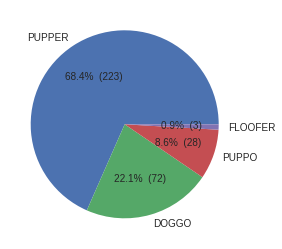

In [0]:
# make the pie circular by setting the aspect ratio to 1
plt.figure(figsize=plt.figaspect(1))
values = twitter_archive_clean.dog_stage.value_counts().values
labels = [x.upper() for x in list(twitter_archive_clean.dog_stage.value_counts().index)]

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.1f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

plt.pie(values, labels=labels, autopct=make_autopct(values))
plt.tight_layout()
plt.savefig("gender_pie_chart.png")

Most of the dogs are pupper.

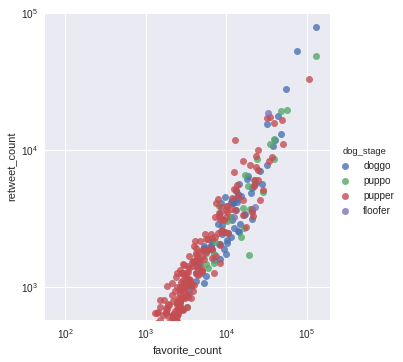

In [0]:
sns.lmplot(x="favorite_count", y="retweet_count",data=twitter_archive_clean, hue='dog_stage', fit_reg=False);
plt.xscale('log');
plt.yscale('log');

There is a positive corelation between favourite_count and retweet_count

In [46]:
twitter_archive_clean.head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating,dog_count,dog_stage,retweet_count,favorite_count,jpg_url,img_num,breed,confidence
0,892420643555336193,2017-08-01 16:23:56,Twitter using from iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,13,1.0,NaN,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Unidentifiable,0.000000
1,892177421306343426,2017-08-01 00:17:27,Twitter using from iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,13,1.0,NaN,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03,Twitter using from iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,12,1.0,NaN,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51,Twitter using from iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,13,1.0,NaN,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24,Twitter using from iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,12,1.0,NaN,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712


Saving dataframe to a csv file

In [0]:
twitter_archive_clean.to_csv("Master_dataframe.csv", header=True, index=False, encoding='utf-8', sep="\t")

In [48]:
twitter_archive_clean.head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating,dog_count,dog_stage,retweet_count,favorite_count,jpg_url,img_num,breed,confidence
0,892420643555336193,2017-08-01 16:23:56,Twitter using from iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,13,1.0,NaN,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Unidentifiable,0.000000
1,892177421306343426,2017-08-01 00:17:27,Twitter using from iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,13,1.0,NaN,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03,Twitter using from iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,12,1.0,NaN,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51,Twitter using from iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,13,1.0,NaN,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24,Twitter using from iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,12,1.0,NaN,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712


In [0]:
twitter_archive_clean=pd.read_csv("Master_dataframe.csv", sep='\t', parse_dates=True,index_col='timestamp')

In [54]:
twitter_archive_clean.head(5)

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating,dog_count,dog_stage,retweet_count,favorite_count,jpg_url,img_num,breed,confidence
timestamp,,,,,,,,,,,,,,,,
2017-08-01 16:23:56,892420643555336193,Twitter using from iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,13.0,1.0,NaN,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Unidentifiable,0.000000
2017-08-01 00:17:27,892177421306343426,Twitter using from iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,13.0,1.0,NaN,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581
2017-07-31 00:18:03,891815181378084864,Twitter using from iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,12.0,1.0,NaN,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012
2017-07-30 15:58:51,891689557279858688,Twitter using from iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,13.0,1.0,NaN,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_retriever,0.168086
2017-07-29 16:00:24,891327558926688256,Twitter using from iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,12.0,1.0,NaN,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712


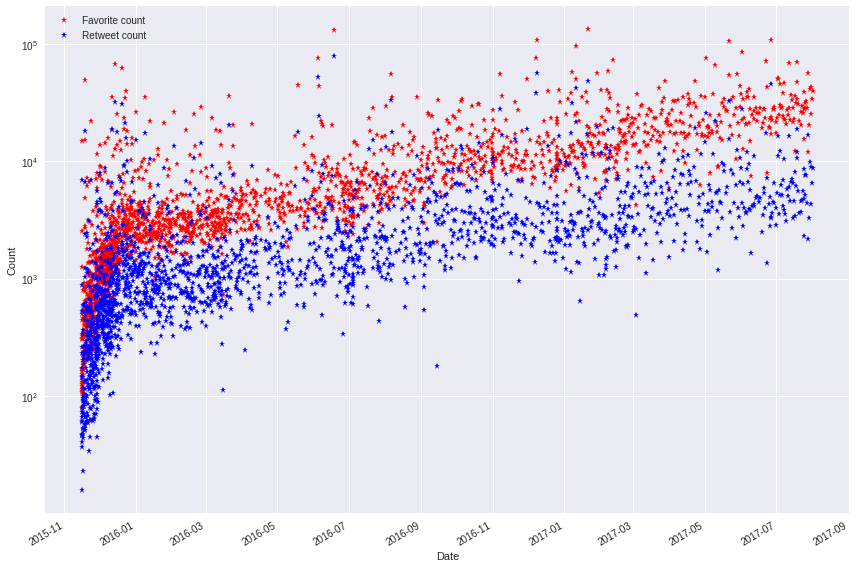

In [0]:
twitter_archive_clean['favorite_count'].plot(style='r*', figsize=(12,8), label='Favorite count');
twitter_archive_clean['retweet_count'].plot(style='b*',label='Retweet count');
plt.legend()
plt.yscale("log")
plt.xlabel("Date");plt.ylabel("Count");
plt.tight_layout()
plt.savefig("favorite_Retweet_count.png")

Above scatter plot shows us that the favourite_count is always greator than retweet_count 

In [0]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1994 entries, 2017-08-01 16:23:56 to 2015-11-15 22:32:08
Data columns (total 17 columns):
tweet_id              1994 non-null int64
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
rating                1993 non-null float64
dog_count             1994 non-null float64
text_split            1994 non-null object
dog_stage             326 non-null object
retweet_count         1994 non-null int64
favorite_count        1994 non-null int64
jpg_url               1994 non-null object
img_num               1994 non-null int64
breed                 1994 non-null object
confidence            1994 non-null float64
dtypes: float64(3), int64(6), object(8)
memory usage: 280.4+ KB


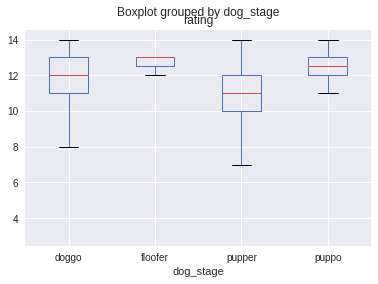

In [0]:
twitter_archive_clean.boxplot(column='rating', by='dog_stage')

In [0]:
twitter_archive_clean['Hour'] = twitter_archive_clean.index.hour
twitter_archive_clean['Month'] = twitter_archive_clean.index.month
twitter_archive_clean['Day of Week'] = twitter_archive_clean.index.day

In [83]:
twitter_archive_clean.head(5)

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating,dog_count,dog_stage,retweet_count,favorite_count,jpg_url,img_num,breed,confidence,Hour,Month,Day of Week
timestamp,,,,,,,,,,,,,,,,,,,
2017-08-01 16:23:56,892420643555336193,Twitter using from iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,13.0,1.0,NaN,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Unidentifiable,0.000000,16,8,1
2017-08-01 00:17:27,892177421306343426,Twitter using from iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,13.0,1.0,NaN,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,0,8,1
2017-07-31 00:18:03,891815181378084864,Twitter using from iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,12.0,1.0,NaN,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,0,7,31
2017-07-30 15:58:51,891689557279858688,Twitter using from iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,13.0,1.0,NaN,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_retriever,0.168086,15,7,30
2017-07-29 16:00:24,891327558926688256,Twitter using from iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,12.0,1.0,NaN,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,16,7,29


In [0]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [0]:
twitter_archive_clean['Day of Week'] = twitter_archive_clean['Day of Week'].map(dmap)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


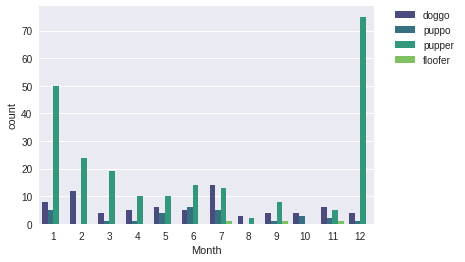

In [86]:
sns.countplot(x='Month',data=twitter_archive_clean,hue='dog_stage',palette='viridis')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

*   pupper seems to be popular throughout the year
*   In the month of July and November doggo is much popular



In [90]:
dayMonth = twitter_archive_clean.groupby(by=['Day of Week','Month']).count()['retweet_count'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,9,10,11,12
Day of Week,,,,,,,,,,,,
Fri,9,7,5,6,4,4,12,4,1,3,2,17
Sat,13,7,5,2,5,4,6,3,3,2,2,14
Sun,9,7,7,5,5,4,4,4,3,2,2,20
Thu,8,4,7,2,5,3,5,3,5,3,1,18
Tue,6,5,6,6,4,5,6,5,3,2,6,24


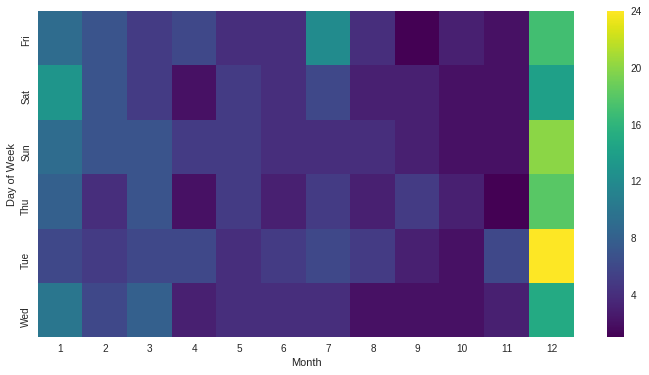

In [91]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='viridis')



*  In December ,most of the users liked the photo on Tuesday,which is amusing because it is not a weekend ,but we may conclude that maybe Christmas or other ocassions fall on Tuesday thus more users clicking on favourite. 

